# Task 1

**Description**: In this code, I generate 20 random values. I find peaks, valleys and calculate the depth of the deepest lake.

1. Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

2. Generating a list of 20 random values

In [2]:
random_values = np.random.randint(1,100,20)
print('List of 20 random values:', random_values)

List of 20 random values: [48  1 98 41 58 54 35 91 26 66 47 27 14 63 42 33  9 60 35 59]


3. Visualization of the list on the graph

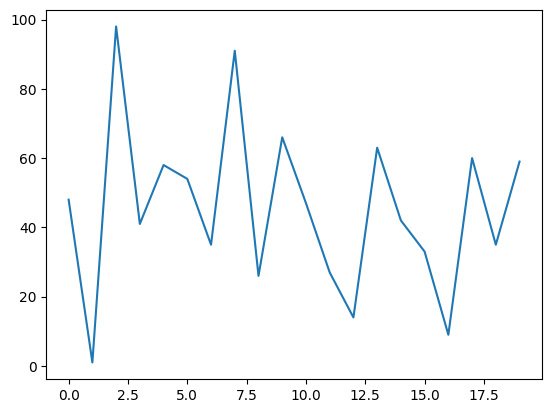

In [3]:
plt.plot(random_values)
plt.show()

4. Finding peaks in the list

In [4]:
peaks, _ = find_peaks(random_values)

# Check the leftmost value
if random_values[0] > random_values[1]:
    peaks = np.insert(peaks, 0, 0)
    
# Check the rightmost value
if random_values[-1] > random_values[-2]:
    peaks = np.append(peaks, len(random_values) - 1)

print('Peaks values:', random_values[peaks])

Peaks values: [48 98 58 91 66 63 60 59]


5. Calculating the depth of the deepest lake

In [5]:
max_depth = 0
deepest_lake = None

# Check all pairs of peaks
for i in range(len(peaks)):
    for j in range(i + 1, len(peaks)):
        start = peaks[i]
        end = peaks[j]
        
        # Check if there is any value between the peaks that is higher
        if np.any(random_values[start + 1:end] > min(random_values[start], random_values[end])):
            continue
                        
        # Minimum between peaks
        valley = np.min(random_values[start + 1:end])
        
        # Depth of the lake
        depth = min(random_values[start], random_values[end]) - valley
        
        # Check if this is the greatest depth
        if depth > max_depth:
            max_depth = depth
            deepest_lake = (start, end, valley, depth)

start, end, valley, depth = deepest_lake
print(
    f"---Deepest lake---\n"
    f"Peaks: {random_values[start]}, {random_values[end]}\n"
    f"Valley: {valley}\n"
    f"Depth: {depth}"
)

---Deepest lake---
Peaks: 98, 91
Valley: 35
Depth: 56


6. Visualization of the deepest lake on the graph

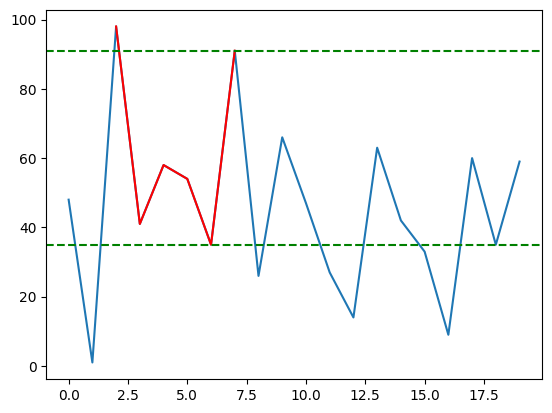

In [6]:
plt.plot(random_values)

# Highlight the section between the start and end peaks in red
plt.plot(range(start, end+1), random_values[start:end+1], color='r')

# Draw a horizontal green dashed line at the 'valley'
plt.axhline(y=valley, color='g', linestyle='--')

# Draw a horizontal green dashed line at the minimum value between the peaks
plt.axhline(y=min(random_values[start], random_values[end]), color='g', linestyle='--')

plt.show()

# Task 2

**Description**: Task about sum and product

There are two whole numbers:
1 < a,b <100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers. 
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog:

    Prod: I don't know the numbers;
    Sum: I know it;
    Prod: Then I know the numbers;
    Sum: Then I know the numbers too.

1. Generate all possible pairs of numbers (a, b)

In [2]:
from itertools import combinations
from sympy import isprime

possible_pairs = [(a, b) for a, b in combinations(range(2, 100), 2)]

2. Creating dictionaries for sums and products

In [3]:
sum_dict = {}
prod_dict = {}

for a, b in possible_pairs:
    S = a + b
    P = a * b
    sum_dict.setdefault(S, []).append((a, b))
    prod_dict.setdefault(P, []).append((a, b))

3. Step 1: Prod says "I don't know the number", meaning P has multiple schedules

In [4]:
valid_products = {P for P in prod_dict if len(prod_dict[P]) > 1}

4. Step 2: Sum says "I knew it", meaning all pairs (a, b) in S avoid numbers that could have only one distribution in the product

In [5]:
valid_sums = {S for S in sum_dict if all(a * b in valid_products for a, b in sum_dict[S])}

5. Step 3: Prod says "Now I know the numbers", meaning he has the only possible choice among the remaining (a, b)

In [6]:
filtered_pairs = [(a, b) for S in valid_sums for a, b in sum_dict[S] if a * b in valid_products]
filtered_prod_dict = {}
for a, b in filtered_pairs:
    P = a * b
    filtered_prod_dict.setdefault(P, []).append((a, b))
final_products = {P for P in filtered_prod_dict if len(filtered_prod_dict[P]) == 1}

6. Step 4: Sum says "Now I know the numbers too", meaning there is only one pair left in sum_dict (a, b)

In [7]:
final_sums = {S for S in valid_sums if len([pair for pair in sum_dict[S] if pair[0] * pair[1] in final_products]) == 1}

solution = [pair for S in final_sums for pair in sum_dict[S] if pair[0] * pair[1] in final_products]
print("(a, b):", solution)


(a, b): [(4, 13)]
